# H SAF H13 (Snow Water Equivalent by Microwave Radiometry) & H65

In this session, the basic properties and use of the H SAF H13 (Snow Water Equivalent by Microwave Radiometry) product will be presented. In addition, the new H65 product is briefly described.





## Snow Water Equivalent as parameter

- If the snow layer would melt in its place the SWE is the depth of the resulting layer of water
- Microwave derived SWE gives information on the snow depth and snow mass unlike other snow products
- Microwave radiometer (MWR) doesn’t depend on solar illumination nor weather making it ideal for operative mapping of snow

- MWR can cover most of the globe daily

- SWE is a very important parameter to hydrology
    - River discharge estimates
    - Potential for Numerical Weather Prediction
    
An example of river discharge estimate of Kemijoki drainage area with and without the use of SWE. The model involved is an in house developed HOPS model (http://hops.fmi.fi, site is in development)

<img src="img/hydro_demo.jpg" style="width:600px;align:left;">

## Operational SWE product H13 in H SAF product portfolio

- The area covered is the ”H SAF grid” or Pan-European grid (longitude 25°W - 45°E, latitude 25°N to 75°N, resolution 0.25°)

- For non-mountainous areas the algorithm used is the FMI SWE algorithm: data fusion of ground based SD observations and spaceborne derived SWE estimates

- For mountainous areas the algorithm used is the modified HUT algorithm. This part is provided by TSMS

- File format is grib2 

## SWE product H65 in development

- The H65 will look like as in this demonstration

<img src="img/h65_demo.jpg" style="width:400px;align:left;">

- The latitude will be extended south to equator (there aren’t large snow masses though)

- Mountainous regions will come from TSMS

- A different projection compared to H13

- File format will be NetCDF (internally HDF5)


## How to get the H13 data?
-----------------
The H13 product can be retrieved in NRT or from web archives.

Near real time data is available via:

- EUMETCast
- H SAF website

Archived older product files are available either from H SAF website (https://hsaf.meteoam.it/). Data download requires registration in both systems.

You can get the data from H SAF website:

<img src="img/h13_download.jpg">

## Visualizing the data
-----------------

Downloaded product can be read using pygrib library. Data can be visualized then using matplotlib.

import necessary libraries

In [24]:
import glob
import pygrib
import numpy as np
import matplotlib.pyplot as plt


In [25]:
files=sorted(glob.glob('data/*.grib2'))


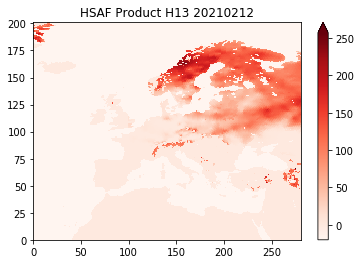

In [26]:
grbs=pygrib.open(files[3])
strings=files[2].split('_')
datestring=strings[1]

grb=grbs.select(name='Remotely sensed snow cover')[0]
data=np.flip(grb.values,0)

fig, ax = plt.subplots()
ax.set_title('HSAF Product H13 %s' %(datestring))
pcm = ax.pcolormesh(data,cmap=plt.cm.Reds)
fig.colorbar(pcm, ax=ax, extend='max')
plt.show()

### Getting data for a specific location and constructing a time series
-----------------
A time series of SWE can be constructed for a specific location. The H SAF grid is 25°N to 75°N latitude, 25°W to 45°E longitude and coordinates are in middle of pixel.


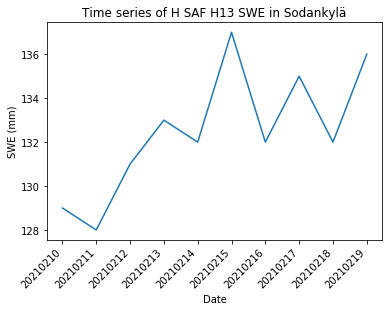

In [27]:
import numpy as np

lat=np.arange(25-0.125,75+0.125,0.25)
lon=np.arange(-25-0.125,45+0.125,0.25)

#FMI Sodankylä site coordinates
sod={}
sod['lat']=67.41667
sod['lon']=26.6

#convert to pixel coordinates
lat_val=lat.flat[np.abs(lat-sod['lat']).argmin()]
lon_val=lon.flat[np.abs(lon-sod['lon']).argmin()]

sod['x']=np.where(lon==lon_val)
sod['y']=np.where(lat==lat_val)

swe_data=[]
xdata=[]

for file in files:
    strings=file.split('_')
    datestring=strings[1]
    
    grbs=pygrib.open(file)
    grb=grbs.select(name='Remotely sensed snow cover')[0]
    data=np.flip(grb.values,0)
    
    dvalue=data[sod['y'],sod['x']]
    swe_data.append(dvalue[0])
    xdata.append(datestring)
    
fig, ax = plt.subplots()
ax.set_title('Time series of H SAF H13 SWE in Sodankylä')
fig=plt.plot(xdata,swe_data)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('SWE (mm)')
plt.xlabel('Date')
plt.show()